### Import dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Data import
df = pd.read_csv('../datasets/telco-customer-churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Look for types inside the dataset

In [2]:
print(df.dtypes)
print(df.dtypes.value_counts())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
object     18
int64       2
float64     1
Name: count, dtype: int64


Check for null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Check for missing values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Cleaning dataset
- Remove id
- Convert Churn values to binary
- Convert TotalCharges to numeric
- Convert data to dummies

In [6]:
# Remove customers' IDs because it's going to interfere with get_dummies
df_no_ids = df.iloc[:,1:]

# Convert Churn data to binary
df_no_ids['Churn'] = df_no_ids['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

df_no_ids.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [8]:
X = df_no_ids
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns
print(X[cat_cols].nunique().sort_values(ascending=False).head(10))


TotalCharges        6531
PaymentMethod          4
OnlineBackup           3
OnlineSecurity         3
TechSupport            3
DeviceProtection       3
InternetService        3
MultipleLines          3
StreamingMovies        3
StreamingTV            3
dtype: int64


In [9]:
# Convert TotalCharges to numeric
df_no_ids.TotalCharges = pd.to_numeric(df_no_ids.TotalCharges, errors='coerce')
df_no_ids.isnull().sum()

X = df_no_ids
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

X_dummies = pd.get_dummies(
    X,
    columns=cat_cols,
    drop_first=True,
    dummy_na=False
)

# X_dummies is now fully numeric and ready for modeling
print(X_dummies.shape)
print(X_dummies.head())


(7043, 31)
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                   

### Find correlations between churn and other values

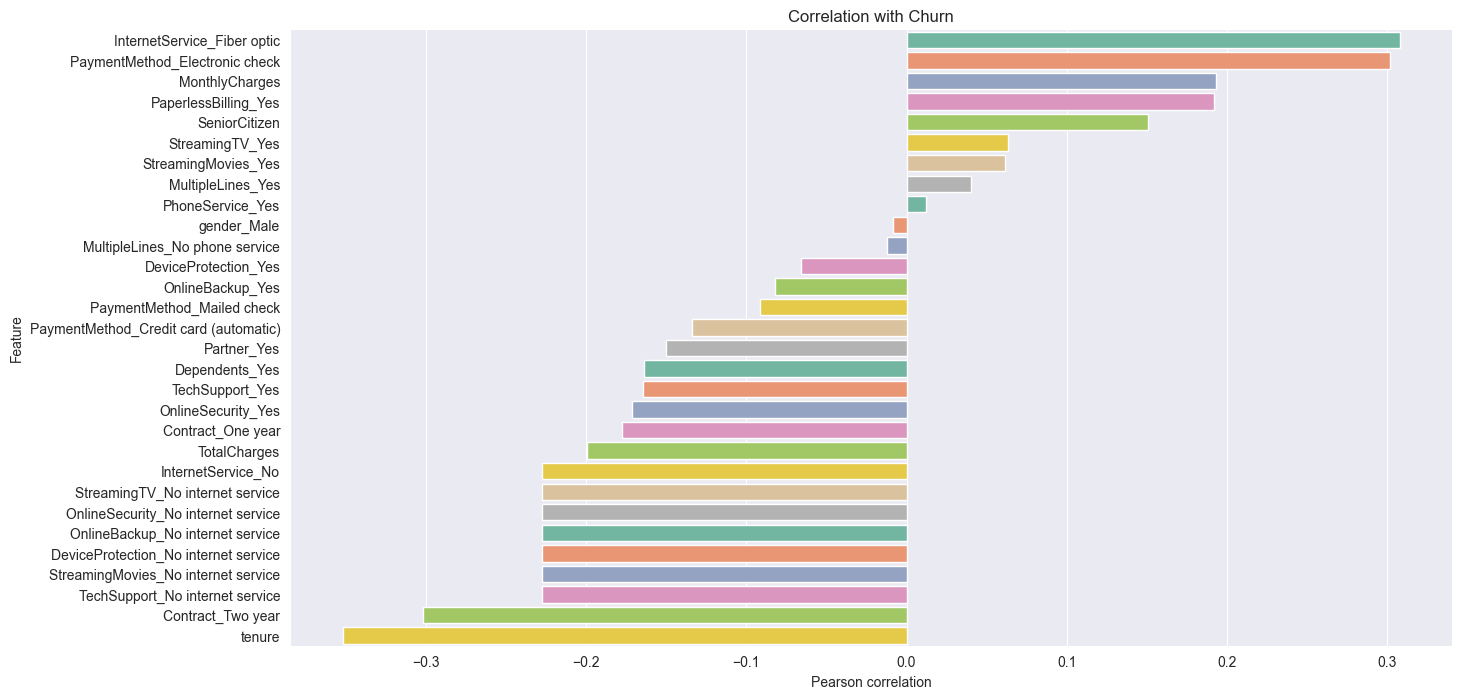

In [10]:
# Get Correlation of "Churn" with other variables:
corr = X_dummies.corr()['Churn'].drop('Churn', errors='ignore').sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=corr.values, y=corr.index, orient='h', palette='Set2', hue=corr.index)
ax.set_title('Correlation with Churn')
ax.set_xlabel('Pearson correlation')
ax.set_ylabel('Feature')
sns.despine()


### Observation
InternetService_Fiber optic, PaymentMethod_Electronic check and MonthlyCharges seem to be positively correlated to churn.

On the contrary, Tenure, Contract_Two year and InternetService_No seem to be negatively correlated. We will explore these values to find other clues

We will first find the demographic of our customers.
1. Gender Distribution - About half of the customers are male and the other half female

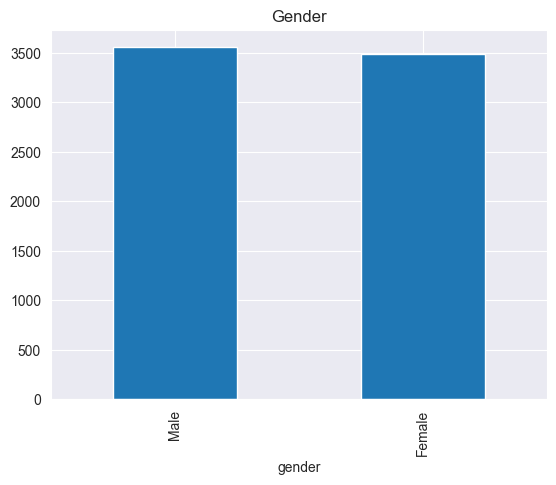

In [13]:
ax = df['gender'].value_counts().plot(kind='bar', title='Gender')

2. Senior Citizen Percentage - About 16.2% of our customers are Senior Citizen, and about 83.8% are not.

Text(0, 0.5, 'Percentage')

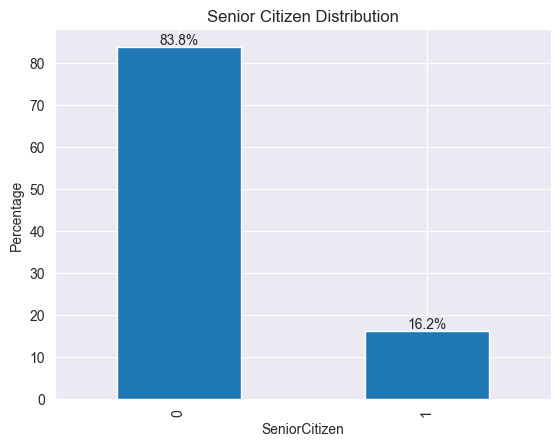

In [17]:
# Calculate percentages
total = len(df['SeniorCitizen'])
percentages = (df['SeniorCitizen'].value_counts() / total) * 100

# Create a bar plot with percentages
ax = percentages.plot(kind='bar', title='Senior Citizen Distribution')

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.ylabel('Percentage')


3. Do they have a partner, or are they dependent - About partner distribution it's about 50/50 as for dependents it seems 70/30

Text(0, 0.5, 'Percentage')

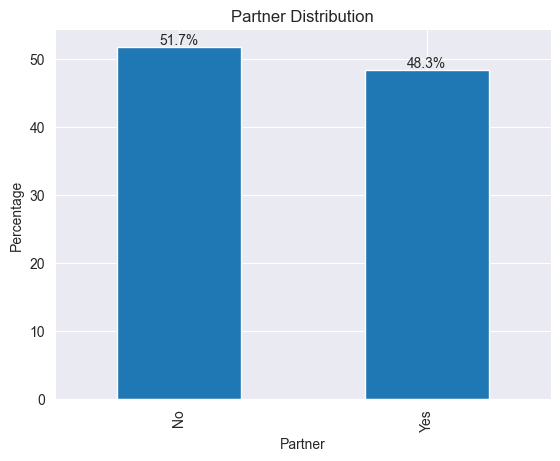

In [18]:
# Calculate percentages
total = len(df['Partner'])
percentages = (df['Partner'].value_counts() / total) * 100

# Create a bar plot with percentages
ax = percentages.plot(kind='bar', title='Partner Distribution')

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

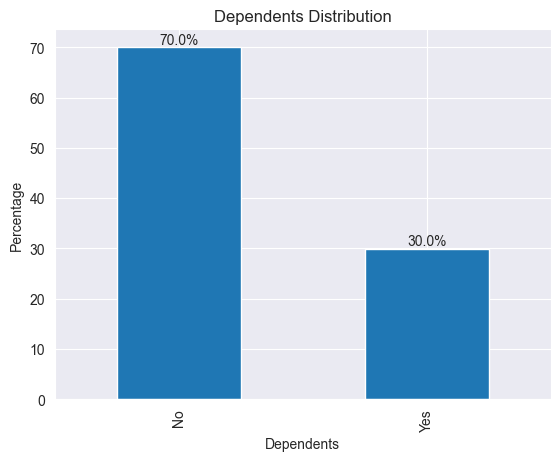

In [20]:
# Calculate percentages
total = len(df['Dependents'])
percentages = (df['Dependents'].value_counts() / total) * 100

# Create a bar plot with percentages
ax = percentages.plot(kind='bar', title='Dependents Distribution')

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.ylabel('Percentage')

We will now look at customers' length of contracts and tenure

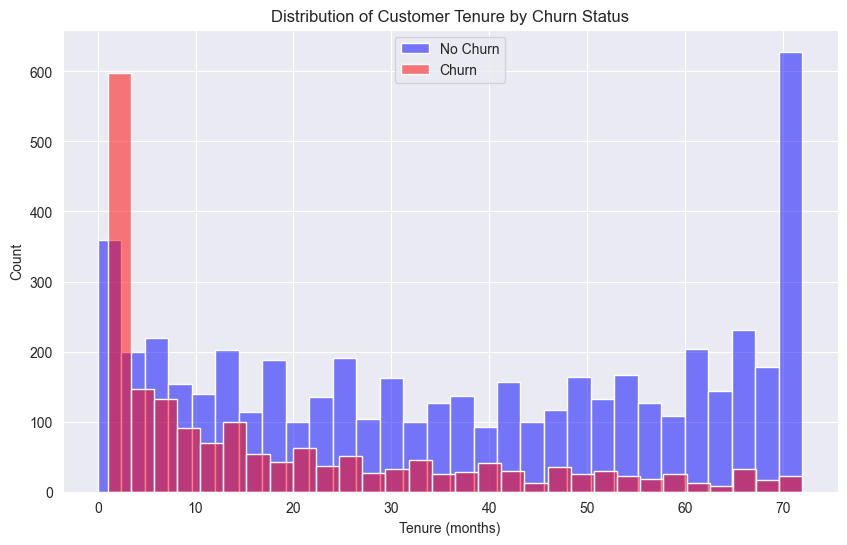

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_ids[df_no_ids['Churn'] == 0], x='tenure', bins=30,
             color='blue', label='No Churn', alpha=0.5)
sns.histplot(data=df_no_ids[df_no_ids['Churn'] == 1], x='tenure', bins=30,
             color='red', label='Churn', alpha=0.5)
plt.title('Distribution of Customer Tenure by Churn Status')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend()
plt.show()
